In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request as urllib2

### problem 4

In [73]:
req = urllib2.Request("https://courses.grainger.illinois.edu/cs361/fa2020/smoking.txt")
response = urllib2.urlopen(req)
the_page = response.read()
raw = the_page.decode('utf-8').splitlines()

In [74]:
raw = raw[-3][raw[-3].find('AL'):-4]
raw = raw.split(' ')

In [98]:
data = [[0.0 for x in range(6)] for y in range(len(raw) // 6)] 
for i in range(len(raw) // 6):
    data[i][0] = raw[6*i]
    for j in range(1,6):
        data[i][j] = float(raw[6*i+j])

In [76]:
df = pd.DataFrame([data[i][1:] for i in range(len(data))],index=[data[i][0] for i in range(len(data))], 
                  columns={'CIG', 'BLAD', 'LUNG', 'KID', 'LEUK'})

In [99]:
data.remove(data[-20])
data.remove(data[6])

In [100]:
df_modified = pd.DataFrame([data[i][1:] for i in range(len(data))],index=[data[i][0] for i in range(len(data))], 
                  columns={'CIG', 'BLAD', 'LUNG', 'KID', 'LEUK'})

In [53]:
df.corr()

,CIG,LUNG,BLAD,KID,LEUK
CIG,1.000000,0.703622,0.697403,0.487390,-0.068481
LUNG,0.703622,1.000000,0.658501,0.358814,0.162157
BLAD,0.697403,0.658501,1.000000,0.282743,-0.151584
KID,0.487390,0.358814,0.282743,1.000000,0.188713
LEUK,-0.068481,0.162157,-0.151584,0.188713,1.000000


In [101]:
df_modified.corr()

,CIG,LUNG,BLAD,KID,LEUK
CIG,1.000000,0.607626,0.714480,0.579080,-0.101009
LUNG,0.607626,1.000000,0.640490,0.370746,0.183221
BLAD,0.714480,0.640490,1.000000,0.266764,-0.172279
KID,0.579080,0.370746,0.266764,1.000000,0.184801
LEUK,-0.101009,0.183221,-0.172279,0.184801,1.000000


In [102]:
data = df.to_numpy()
data_mod = df_modified.to_numpy()

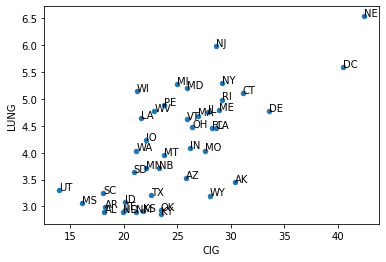

In [133]:
ax = df.plot.scatter('CIG', 'LUNG')
for i in range(df.size//5):
    ax.text(df['CIG'][i], df['LUNG'][i], str(df.index[i]))

### problem 5

In [2]:
ko = pd.read_csv('KO.csv')  
pep = pd.read_csv('PEP.csv')  

In [3]:
kop = ko['Adj Close'].to_numpy()
pepp = pep['Adj Close'].to_numpy()

In [146]:
np.corrcoef(kop,pepp)[0,1]

0.6632975687798601

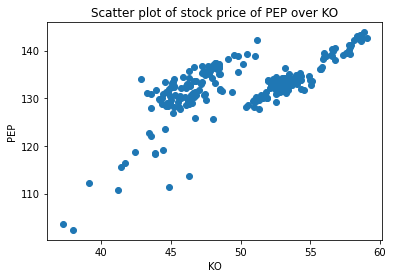

In [156]:
plt.scatter(kop,pepp)
plt.xlabel('KO')
plt.ylabel('PEP')
plt.title("Scatter plot of stock price of PEP over KO")
plt.show()

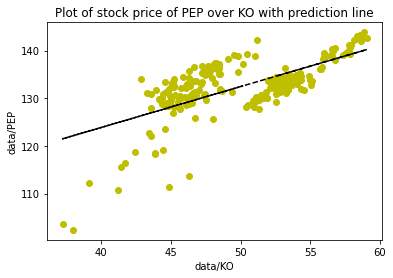

In [9]:
coef = np.polyfit(kop, pepp, 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(kop,pepp, 'yo', kop, poly1d_fn(kop), '--k')
plt.xlabel('data/KO')
plt.ylabel('data/PEP')
plt.title("Plot of stock price of PEP over KO with prediction line")
plt.show()